# Visualization

In [4]:
import seaborn as sns
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import json 
import folium
import warnings
import pandas as pd

In [23]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [9]:
%matplotlib inline

In [6]:
df = pd.read_csv("visualization.csv", encoding="cp949")

In [7]:
item_df = pd.DataFrame({'cnt':df.groupby(['제휴사','소분류명']).size()}).reset_index()

(array([   0,    1,    2, ..., 1424, 1425, 1426]),
 <a list of 1427 Text xticklabel objects>)

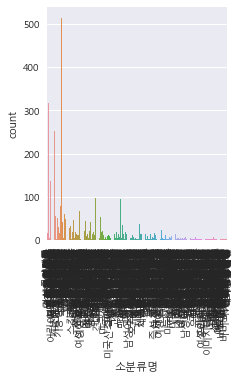

In [11]:
sns.factorplot('소분류명',kind='count',data=df[df['제휴사']=="B"])
plt.xticks(rotation=90)

In [12]:
tt = item_df[item_df['제휴사']=="B"]
tt = tt.sort_values(by='cnt',ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

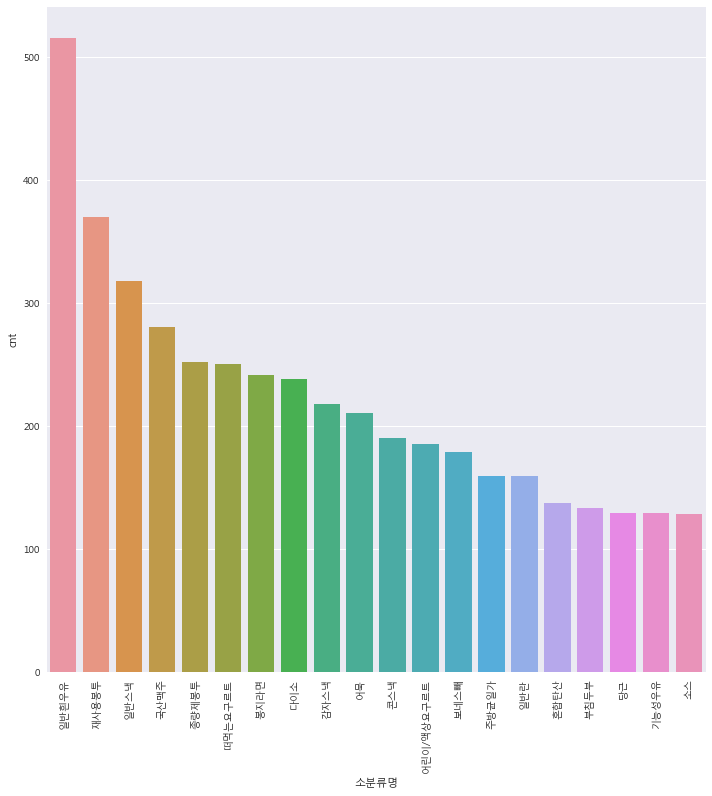

In [13]:
sns.factorplot(data=tt.head(20),x='소분류명',y='cnt',kind='bar',size=10)
plt.xticks(rotation=90)

In [14]:
def changePost(x):
    if len(str(x)) < 3:
        x = "0" + str(x)
        return(x)
    else:
        return(x)

In [15]:
tmp_df = df.dropna(subset=['거주지역'])
tmp_df['거주지역'] = tmp_df['거주지역'].astype(object)
tmp_df['거주지역'] = tmp_df['거주지역'].apply(changePost)

C:\ProgramData\Anaconda3\envs\work\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\envs\work\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text xticklabel objects>)

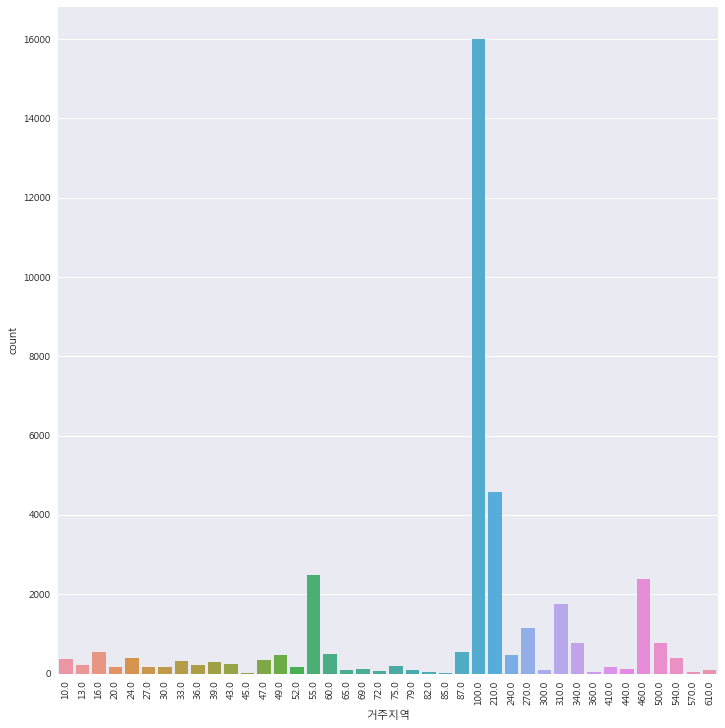

In [16]:
sns.factorplot('거주지역',data=tmp_df,kind='count',size=10)
plt.xticks(rotation=90)

In [18]:
zip_code_total = pd.read_csv("zipcode.csv", encoding="cp949")

In [19]:
zip_code_total.head()

,ZIP,시도,시군구
0,256,강원도,강릉시
1,254,강원도,강릉시
2,255,강원도,강릉시
3,247,강원도,고성군
4,257,강원도,동해시


In [20]:
tmp_df = pd.merge(tmp_df,zip_code_total,left_on="거주지역",right_on="ZIP")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text xticklabel objects>)

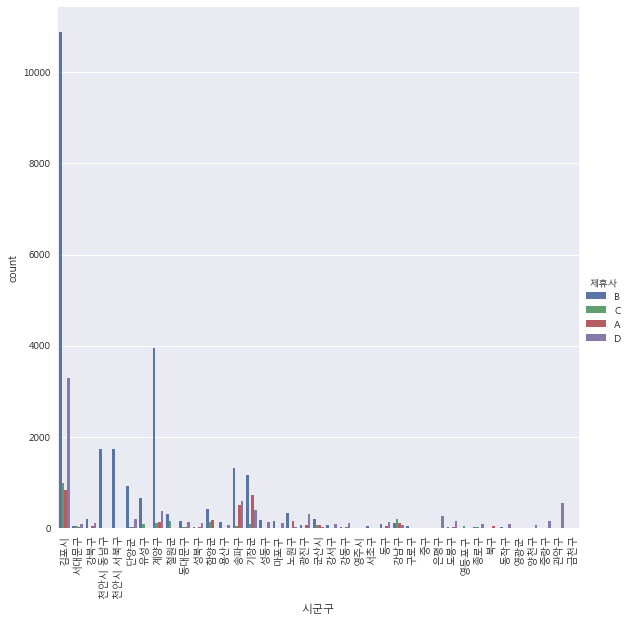

In [21]:
sns.factorplot('시군구',hue='제휴사',kind='count',data=tmp_df,size=8)
plt.xticks(rotation=90)

In [22]:
gu_df = pd.DataFrame({'cnt':tmp_df.groupby(['시군구','제휴사']).size()}).reset_index()

In [24]:
geo_path = 'skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path,encoding='utf-8'))

In [28]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_str = geo_str,
               data = gu_df[gu_df['제휴사']=="D"][['시군구','cnt']],
               columns = ['시군구', 'cnt'],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')

In [29]:
map

In [30]:
gu_df2 = pd.DataFrame({'cnt':tmp_df.groupby(['시군구']).size()}).reset_index()

In [42]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_str = geo_str,
               data = gu_df2[['시군구','cnt']],
               columns = ['시군구', 'cnt'],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id',
               )
map